# HAB Data Wrangling

* [Getting Started](#Getting_Started)
* [1. Ohio Data](#1_Ohio_Data)
    * [1.1 Archived Ohio Data](#1.1_Archived_Ohio_Data)
    * [1.2 Current Ohio Data](#1.2_Current_Ohio_Data)
* [2. GLERL Data](#2_Glerl_Data)
    * [2.1 Archived GLERL Data](#2.1_Archived_Glerl_Data)
    * [2.2 Current GLERL_Data](#2.2_Current_Glerl_Data)

## Getting Started<a id='Getting_Started'></a>

Started with setting up a file structure using cookiecutter and transferring data to the raw data subdirectory. 

In [186]:
from glob import glob
import numpy as np
import pandas as pd
import os
import re

In [2]:
#Create list of all results csv files using glob - just as an exercise. 
#Not enough files at this point to really be necessary.
PATH = "../data/raw"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT)) if re.search('results', file, re.IGNORECASE)]
print(all_csv_files)
print(len(all_csv_files))

['../data/raw/HAB_Sampling_Results_2010_2018.csv', '../data/raw/HAB_Sampling_Results.csv', '../data/raw/0187718/2.2/data/0-data/lake_erie_habs_field_sampling_results_2012_2018_v2.csv', '../data/raw/0209116/1.1/data/0-data/lake_erie_habs_field_sampling_results_2019.csv']
4


## 1. Ohio Data<a id='1_Ohio_Data'></a>

### 1.1 Archived Ohio Data<a id='1.1_Archived_Ohio_Data'></a>

First I import the archived Ohio EPA toxin data and clean it. This data set contains many entirely empty rows at the end, so any rows with no site value are removed.

In [3]:
#import ohio 2010 to 2018 data and remove trailing null rows
df_oh_10_18_raw = pd.read_csv('../data/raw/HAB_Sampling_Results_2010_2018.csv', header=7, parse_dates=['Collect Date'])
df_oh_10_18_raw = df_oh_10_18_raw[~pd.isnull(df_oh_10_18_raw['Site'])]
df_oh_10_18_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30905 entries, 0 to 30904
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             30905 non-null  object        
 1   Site ID          30905 non-null  object        
 2   Site Type        30905 non-null  object        
 3   Collect Date     30905 non-null  datetime64[ns]
 4   Collection Time  30905 non-null  object        
 5   Sample ID        30905 non-null  object        
 6   Parameter        30905 non-null  object        
 7   Result           30895 non-null  object        
 8   Units            30905 non-null  object        
 9   Qual.*           4158 non-null   object        
 10  Program          7620 non-null   object        
 11  Lab              30905 non-null  object        
 12  Lat              7059 non-null   float64       
 13  Long             7059 non-null   float64       
dtypes: datetime64[ns](1), float64(2), obje

In [4]:
#select only sites that are related to Lake Erie
df_oh_10_18 = df_oh_10_18_raw[df_oh_10_18_raw['Site'].str.contains('erie', case=False)].copy()
print(df_oh_10_18.info())
df_oh_10_18.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 96 to 30711
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             3313 non-null   object        
 1   Site ID          3313 non-null   object        
 2   Site Type        3313 non-null   object        
 3   Collect Date     3313 non-null   datetime64[ns]
 4   Collection Time  3313 non-null   object        
 5   Sample ID        3313 non-null   object        
 6   Parameter        3313 non-null   object        
 7   Result           3309 non-null   object        
 8   Units            3313 non-null   object        
 9   Qual.*           231 non-null    object        
 10  Program          954 non-null    object        
 11  Lab              3313 non-null   object        
 12  Lat              151 non-null    float64       
 13  Long             151 non-null    float64       
dtypes: datetime64[ns](1), float64(2), obje

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long
96,LAKE ERIE UTILITIES CO 2-TP-LT2001-Raw,6262096-LT2001,PWS Plant Intake Site,2018-12-25,00:00,2121629,Microcystins,ND,ug/L,NaN,NaN,OSU STONE LABORATORY,41.689305,-82.817555
281,LAKE ERIE UTILITIES CO 2-TP-LT2001-Raw,6262096-LT2001,PWS Plant Intake Site,2018-12-10,00:00,2115433,Microcystins,ND,ug/L,NaN,NaN,OSU STONE LABORATORY,41.689305,-82.817555
443,LAKE ERIE UTILITIES CO 2-TP-LT2001-Raw,6262096-LT2001,PWS Plant Intake Site,2018-11-26,00:00,2107254,Microcystins,ND,ug/L,NaN,NaN,OSU STONE LABORATORY,41.689305,-82.817555
623,LAKE ERIE UTILITIES CO 2-TP-LT2001-Raw,6262096-LT2001,PWS Plant Intake Site,2018-11-12,00:00,2103289,Microcystins,ND,ug/L,NaN,NaN,OSU STONE LABORATORY,41.689305,-82.817555
843,Lake Erie Utilities WTP,6262096-EP002,PWS Finished Water Site,2018-10-29,00:00,2094113,Microcystins,ND,ug/L,NaN,NaN,OSU STONE LABORATORY,41.689305,-82.817555


In [5]:
#Change not detected values to 0.
df_oh_10_18.loc[df_oh_10_18['Result']=='ND','Result'] = 0
df_oh_10_18.loc[df_oh_10_18['Result']=='ND']

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long


In [6]:
#Attempt to set Result type to float
df_oh_10_18.loc[:,'Result'] = df_oh_10_18['Result'].astype('float')

ValueError: could not convert string to float: '>10.0'

In [ ]:
#Examine which values contain > sign
print(df_oh_10_18[df_oh_10_18['Result'].astype('str').str.contains('>')]['Result'].unique())
print(df_oh_10_18[df_oh_10_18['Result'].astype('str').str.contains('>')].info())
df_oh_10_18[df_oh_10_18['Result'].astype('str').str.contains('>')]

There are 89 of 3309 result values with approximate rather than exact values. These samples likely maxed out the available detection limit being used for that particular sample. I could either drop the values, or replace them with the max value as an assumption. Since these are, in general, higher values it would likely seriously bias the data to drop all of them. Instead they will be set to the max values and a new column will be added to indicate that these were saturated measurements. Before doing this let's examine the quality notes for the data. The documentation can be found here: https://epa.ohio.gov/Portals/28/documents/habs/LabQualifiersList.pdf

In [7]:
df_oh_10_18['Qual.*'].value_counts()

U-       139
U+        44
J         27
U-,UJ      9
U-,J       5
PS         4
U+,J       1
PS,J       1
UJ         1
Name: Qual.*, dtype: int64

For the most part these codes rever to whether the reported value is above or below the reporting limit and the detection limit (codes containing U). J codes indicate that the analyte is present and the amount is estimated. PS codes indicate that the sample was not submitted within the required shipping time. For now I will retain these values - based on the codes it is not clear that any of them must be dropped.

In [8]:
#Create a column 'Saturation' that is True for measurements that saturated the toxin detector
df_oh_10_18.loc[df_oh_10_18['Result'].astype('str').str.contains('>'), 'Saturation'] = True
df_oh_10_18.loc[~df_oh_10_18['Result'].astype('str').str.contains('>'), 'Saturation'] = False

In [9]:
#Remove inequalities to set saturated measurements to max values
df_oh_10_18.loc[df_oh_10_18['Saturation'], 'Result'] = df_oh_10_18.loc[df_oh_10_18['Saturation'], 'Result'].str.strip('>')

In [10]:
#Attempt to set Result type to float
df_oh_10_18.loc[:,'Result'] = df_oh_10_18['Result'].astype('float')

,Result,Lat,Long
count,3309.000000,151.000000,151.000000
mean,2.387426,41.650111,-82.795510
std,56.021485,0.101427,0.397445
min,0.000000,41.405567,-83.376958
25%,0.000000,41.660700,-82.817555
50%,0.000000,41.689305,-82.817555
75%,0.670000,41.689305,-82.817555
max,3144.690000,41.994569,-80.529958


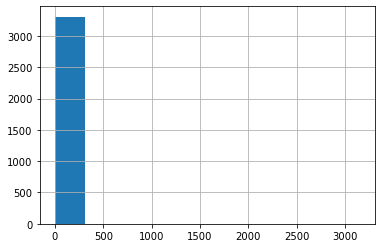

In [11]:
df_oh_10_18['Result'].hist()
df_oh_10_18.describe()

There appear to be some outliers, let's take a look at what they are. In terms of reference values, the Ohio EPA has a drinking level limit of 1.6 ug/L, a recreational limit of 6 ug/L for swimming and a strict no contact advisory for levels over 20 ug/L. Let's look at values over 20 ug/L.

In [12]:
df_oh_10_18.loc[df_oh_10_18['Result'] > 20].sort_values('Result', ascending=False)

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation
23964,Lake Erie @ Gibralter Island Docks,GI-DOCKS1,Lake Site,2015-07-24,18:00,3,Microcystins,3144.690,ug/L,NaN,NaN,Stone Labs,NaN,NaN,False
30629,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2010-08-18,14:10,124405,Microcystins,570.000,ug/L,NaN,NWDO-DSW,DES,NaN,NaN,False
29425,Put-In-Bay WTP Lake Erie Intake,IN001-RSSW1,PWS Waterbody Intake Site,2011-09-27,8:00,137339,Microcystins,340.000,ug/L,J,NWDO-DDAGW,DES,NaN,NaN,False
27130,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2014-08-04,8:30,167526,Microcystins,110.000,ug/L,NaN,ODNR,DES,NaN,NaN,False
28946,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2012-09-10,10:40,146764,Microcystins,85.000,ug/L,NaN,OTHERS,DES,NaN,NaN,False
26836,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2014-08-18,8:00,168367,Microcystins,51.000,ug/L,NaN,ODNR,DES,NaN,NaN,False
28218,Ottawa County WTP Lake Erie Intake,IN103287-RS001,PWS Waterbody Intake Site,2013-09-11,7:35,1,Microcystins,50.000,ug/L,NaN,NaN,Oregon,NaN,NaN,True
28217,Ottawa County WTP Lake Erie Intake,IN103287-RS001,PWS Waterbody Intake Site,2013-09-11,7:35,3,Microcystins,50.000,ug/L,NaN,NaN,Oregon,NaN,NaN,True
28214,Carroll Water & Sewer WTP Lake Erie Intake,IN103297-RS001,PWS Waterbody Intake Site,2013-09-11,8:40,5,Microcystins,50.000,ug/L,NaN,NaN,Oregon,NaN,NaN,True
28207,Oregon WTP Lake Erie Intake,IN96930-RSSW1,PWS Waterbody Intake Site,2013-09-11,10:00,2,Microcystins,50.000,ug/L,NaN,NaN,Oregon,NaN,NaN,True


The Gibralter Location has by far the highest value. Let's look at other measurements at this site.

In [13]:
df_oh_10_18[df_oh_10_18['Site'].str.contains('Gibralter')]

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation
23964,Lake Erie @ Gibralter Island Docks,GI-DOCKS1,Lake Site,2015-07-24,18:00,3,Microcystins,3144.69,ug/L,NaN,NaN,Stone Labs,NaN,NaN,False


In [14]:
#The Gibralter measurement is the only data at that location, so it will be dropped.
df_oh_10_18 = df_oh_10_18[~df_oh_10_18['Site'].str.contains('Gibralter')]

The other high results seem to be from Maumee Bay State Park and Put-In-Bay. With regulation cutoffs in mind the 570 ug/L value for Maumee and the 340 ug/L value for Put-In-Bay seem quite high. The code for the Put-In-Bay value suggests it was estimated. Although these are outliers the nature of looking for microcystin events suggests that the values may regularly be quite low with significant local spikes occurring periodically. I will keep these values for now, but perhaps they should at some point be reset to an upper threshold for modeling purposes?

count    3308.000000
mean        1.437515
std        12.354986
min         0.000000
25%         0.000000
50%         0.000000
75%         0.670000
max       570.000000
Name: Result, dtype: float64

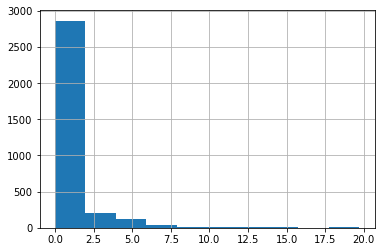

In [15]:
#look at distribution for results below 20 ug/L threshold
df_oh_10_18[df_oh_10_18['Result'] < 20]['Result'].hist()
df_oh_10_18['Result'].describe()

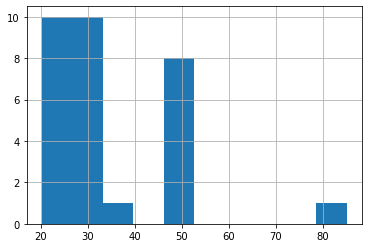

In [16]:
#look at distribution for results above 20 ug/L threshold, below extreme values
df_oh_10_18[(df_oh_10_18['Result'] >= 20) & (df_oh_10_18['Result'] <= 100)]['Result'].hist()

In [17]:
df_oh_10_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 96 to 30711
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             3312 non-null   object        
 1   Site ID          3312 non-null   object        
 2   Site Type        3312 non-null   object        
 3   Collect Date     3312 non-null   datetime64[ns]
 4   Collection Time  3312 non-null   object        
 5   Sample ID        3312 non-null   object        
 6   Parameter        3312 non-null   object        
 7   Result           3308 non-null   float64       
 8   Units            3312 non-null   object        
 9   Qual.*           231 non-null    object        
 10  Program          954 non-null    object        
 11  Lab              3312 non-null   object        
 12  Lat              151 non-null    float64       
 13  Long             151 non-null    float64       
 14  Saturation       3312 non-null   objec

There are still some null values in results, and there are a lot of null lat and long values

In [18]:
#examine null results
df_oh_10_18[df_oh_10_18['Result'].isnull()]

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation
22097,Toledo WTP Lake Erie Intake,IN96944-RS001,PWS Waterbody Intake Site,2015-09-15,0,601,Microcystins,NaN,ug/L,NaN,NaN,Toledo,NaN,NaN,False
22098,Toledo WTP Lake Erie Intake,IN96944-RS001,PWS Waterbody Intake Site,2015-09-15,0,600,Microcystins,NaN,ug/L,NaN,NaN,Toledo,NaN,NaN,False
22154,Toledo WTP Lake Erie Intake,IN96944-RS001,PWS Waterbody Intake Site,2015-09-14,0,589,Microcystins,NaN,ug/L,NaN,NaN,Toledo,NaN,NaN,False
22155,Toledo WTP Lake Erie Intake,IN96944-RS001,PWS Waterbody Intake Site,2015-09-14,0,588,Microcystins,NaN,ug/L,NaN,NaN,Toledo,NaN,NaN,False


In [19]:
#drop null results examine some null coordinates
df_oh_10_18 = df_oh_10_18[~df_oh_10_18['Result'].isnull()].copy()
#examine some null coordinates
df_oh_10_18[df_oh_10_18['Lat'].isnull()]

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation
7205,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2017-09-18,0.503472222,17092001-01,Microcystins,6.73,ug/L,NaN,ODNR-HAB,DES,NaN,NaN,False
7232,LAKE ERIE UTILITIES CO 2-TP-LT2001-Raw,6262096-LT2001,PWS Plant Intake Site,2017-09-18,0,1874416,Microcystins,1.02,ug/L,NaN,NaN,OSU STONE LABORATORY,NaN,NaN,False
7233,Lake Erie Utilities WTP,6262096-EP002,PWS Finished Water Site,2017-09-18,0,1874417,Microcystins,0.00,ug/L,NaN,NaN,OSU STONE LABORATORY,NaN,NaN,False
7305,Lake Erie Ambient Station - Rocky River,300895,Lake Site,2017-09-12,0.515972222,17091206-02,Microcystins,0.00,ug/L,U-,DSW-NEDO,DES,NaN,NaN,False
7306,Lake Erie Ambient Station - Lorain West,301257,Lake Site,2017-09-12,0.473611111,17091206-06,Microcystins,0.00,ug/L,U-,DSW-NEDO,DES,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30703,Huron WTP Lake Erie Intake,IN85625-RSSW1,PWS Waterbody Intake Site,2010-08-10,9:03,123838,Microcystins,0.00,ug/L,NaN,NWDO-DDAGW,DES,NaN,NaN,False
30704,Huron WTP Lake Erie Intake,IN85625-RSSW1,PWS Waterbody Intake Site,2010-08-10,9:03,123838,Saxitoxin,0.00,ug/L,NaN,NWDO-DDAGW,DES,NaN,NaN,False
30708,Lake Erie Utilities WTP,6256901-EP001,PWS Finished Water Site,2010-08-09,16:20,123873,Microcystins,0.00,ug/L,NaN,CO-DDAGW,DES,NaN,NaN,False
30709,Lake Erie Utilities WTP Lake Erie Intake,IN103154-RSSW1,PWS Waterbody Intake Site,2010-08-09,16:15,123872,Microcystins,0.29,ug/L,NaN,CO-DDAGW,DES,NaN,NaN,False


In [20]:
#see if there are any coordinates listed for one of these sites
df_oh_10_18[(df_oh_10_18['Site'] == 'Maumee Bay State Park Lake Erie Beach') & ~df_oh_10_18['Lat'].isnull()]

,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation
3087,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2018-07-12,12:00,18071301-01,Microcystins,0.862,ug/L,NaN,ODNR-HAB,DES,41.685758,-83.376958,False
6431,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2017-10-17,08:30,17101804-01,Microcystins,0.000,ug/L,U+,ODNR-HAB,DES,41.685758,-83.376958,False
6585,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2017-10-10,10:02,17101106-01,Microcystins,1.050,ug/L,NaN,ODNR-HAB,DES,41.685758,-83.376958,False
6839,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2017-10-02,11:30,17100306-01,Microcystins,6.650,ug/L,NaN,ODNR-HAB,DES,41.685758,-83.376958,False
6883,Maumee Bay State Park Lake Erie Beach,ODNR43,Lake Site,2017-09-27,08:30,17092801-01,Microcystins,2.650,ug/L,NaN,ODNR-HAB,DES,41.685758,-83.376958,False


Some of the sites probably have coordinates listed somewhere in the dataframe, just need to find them and replace the null values for all measurements.

In [22]:
coords_lat = dict()
coords_long = dict()
for site_id, frame in df_oh_10_18.groupby('Site ID'):
    lat_data = frame['Lat'].unique()[0]
    long_data = frame['Long'].unique()[0]
    coords_lat[site_id] = lat_data
    coords_long[site_id] = long_data

In [23]:
coords_lat

{'2253913-LE': nan,
 '300892': 41.994569,
 '300895': nan,
 '300897': nan,
 '300898': nan,
 '301075': nan,
 '301076': nan,
 '301254': 41.87507,
 '301255': 41.77903,
 '301256': 41.604043,
 '301257': nan,
 '301258': 41.768322999999995,
 '301259': nan,
 '301269': nan,
 '302007': nan,
 '302008': nan,
 '302009': nan,
 '302010': nan,
 '302011': nan,
 '302146': nan,
 '302153': nan,
 '302502': 41.557817,
 '302821': 41.6957,
 '303465': 41.459683,
 '303466': 41.405567,
 '303467': 41.428333,
 '303468': 41.556748999999996,
 '303470': 41.6607,
 '4855847-LE': nan,
 '6256901-EP001': nan,
 '6262096-EP002': 41.689305,
 '6262096-LT2001': 41.689305,
 'CampPerryBeach': nan,
 'IN001-RS301': nan,
 'IN001-RSSW1': nan,
 'IN103154-RSSW1': nan,
 'IN103287-RS001': nan,
 'IN103297-RS001': nan,
 'IN35924-RSSW2': nan,
 'IN85625-RSSW1': nan,
 'IN85630-RS001': nan,
 'IN85651-RSSW1': nan,
 'IN85659-RSSW1': nan,
 'IN85677-RS001': nan,
 'IN94575-RS001': nan,
 'IN94598-RSSW1': nan,
 'IN94603-RSSW1': nan,
 'IN94622-RS001':

I was able to locate some more site coordinates here: https://www.epa.state.oh.us/Portals/35/lakeerie/2015_Erie_Study_Plan.pdf
and here:
https://www.epa.state.oh.us/Portals/35/lakeerie/2014_Erie_Study_Plan.pdf

I transferred the coordinate data into the document 'ohio_coords.txt'

In [47]:
with open('../data/raw/ohio_coords.txt') as file:
    for line in file:
        coords_lat[line.split()[0]] = float(line.split()[-2])
        coords_long[line.split()[0]] = float(line.split()[-1])

In [48]:
for site_id in coords_lat:
    df_oh_10_18.loc[df_oh_10_18['Site ID'] == site_id, 'Lat'] = coords_lat[site_id]
for site_id in coords_long:
    df_oh_10_18.loc[df_oh_10_18['Site ID'] == site_id, 'Long'] = coords_long[site_id]

In [49]:
#check that our example from above was successfully replaced
print(df_oh_10_18.loc[7205])
#are there any null values left for this site?
df_oh_10_18[(df_oh_10_18['Site'] == 'Maumee Bay State Park Lake Erie Beach') 
            & df_oh_10_18['Lat'].isnull()]

Site               Maumee Bay State Park Lake Erie Beach
Site ID                                           ODNR43
Site Type                                      Lake Site
Collect Date                         2017-09-18 00:00:00
Collection Time                              0.503472222
Sample ID                                    17092001-01
Parameter                                   Microcystins
Result                                              6.73
Units                                               ug/L
Qual.*                                               NaN
Program                                         ODNR-HAB
Lab                                                  DES
Lat                                              41.6858
Long                                             -83.377
Saturation                                         False
Name: 7205, dtype: object


,Site,Site ID,Site Type,Collect Date,Collection Time,Sample ID,Parameter,Result,Units,Qual.*,Program,Lab,Lat,Long,Saturation


In [50]:
df_oh_10_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3308 entries, 96 to 30711
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             3308 non-null   object        
 1   Site ID          3308 non-null   object        
 2   Site Type        3308 non-null   object        
 3   Collect Date     3308 non-null   datetime64[ns]
 4   Collection Time  3308 non-null   object        
 5   Sample ID        3308 non-null   object        
 6   Parameter        3308 non-null   object        
 7   Result           3308 non-null   float64       
 8   Units            3308 non-null   object        
 9   Qual.*           231 non-null    object        
 10  Program          954 non-null    object        
 11  Lab              3308 non-null   object        
 12  Lat              702 non-null    float64       
 13  Long             702 non-null    float64       
 14  Saturation       3308 non-null   objec

In [53]:
df_oh_10_18[(df_oh_10_18['Site Type']=='Lake Site') & 
            df_oh_10_18['Lat'].isnull()]['Site ID'].value_counts()

302011            16
302007            12
302008            10
302010             4
302009             3
CampPerryBeach     3
302146             1
Name: Site ID, dtype: int64

I was unable to locate the remaining coordinates, so I have selected the non-null locations.

In [63]:
df_oh_final = df_oh_10_18[~df_oh_10_18['Lat'].isnull()].copy()
df_oh_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 96 to 30660
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             702 non-null    object        
 1   Site ID          702 non-null    object        
 2   Site Type        702 non-null    object        
 3   Collect Date     702 non-null    datetime64[ns]
 4   Collection Time  702 non-null    object        
 5   Sample ID        702 non-null    object        
 6   Parameter        702 non-null    object        
 7   Result           702 non-null    float64       
 8   Units            702 non-null    object        
 9   Qual.*           193 non-null    object        
 10  Program          498 non-null    object        
 11  Lab              702 non-null    object        
 12  Lat              702 non-null    float64       
 13  Long             702 non-null    float64       
 14  Saturation       702 non-null    object

### 1.2 Current Ohio Data<a id='1.2_Current_Ohio_Data'></a>

Next I import the current Ohio EPA toxin data and clean it. Several columns need manual naming or removal if they contain no data. Also, here ND is used to indicate that no toxin is detected in the results tab, so those values are set to zero.

In [68]:
df_oh = pd.read_csv('../data/raw/HAB_Sampling_Results.csv', header=7, parse_dates=['Collect Date/Time'])
df_oh = df_oh[~pd.isnull(df_oh['Site'])]
print(df_oh.info())
df_oh.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11048 entries, 0 to 11047
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site               11048 non-null  object        
 1   Site ID            11048 non-null  object        
 2   Site Type          11048 non-null  object        
 3   Collect Date/Time  11048 non-null  datetime64[ns]
 4   Unnamed: 4         11048 non-null  object        
 5   Sample ID          11048 non-null  object        
 6   Parameter          11048 non-null  object        
 7   Unnamed: 7         0 non-null      float64       
 8   Result             11048 non-null  object        
 9   Units              11048 non-null  object        
 10  Qual.*             0 non-null      float64       
 11  Program            710 non-null    object        
 12  Lab                11048 non-null  object        
 13  Lat                11048 non-null  float64       
 14  Long  

,Site,Site ID,Site Type,Collect Date/Time,Unnamed: 4,Sample ID,Parameter,Unnamed: 7,Result,Units,Qual.*,Program,Lab,Lat,Long
0,BARBERTON WTP-TP-LT2001-Raw,7758601-LT2001,PWS Plant Intake Site,2020-09-30,14:45,20100102-01,Saxitoxin,NaN,ND,ug/L,NaN,HAB-NEDO,DES,41.056511,-81.613794
1,Barberton WTP,7758601-EP001,PWS Finished Water Site,2020-09-30,14:35,20100102-02,Saxitoxin,NaN,ND,ug/L,NaN,HAB-NEDO,DES,41.056511,-81.613794
2,WARREN WTP-TP-LT2001-Raw,7859141-LT2001,PWS Plant Intake Site,2020-09-30,10:15,20100101-01,Saxitoxin,NaN,ND,ug/L,NaN,HAB-NEDO,DES,41.291369,-80.760567
3,Warren WTP,7859141-EP001,PWS Finished Water Site,2020-09-30,10:00,20100101-02,Saxitoxin,NaN,ND,ug/L,NaN,HAB-NEDO,DES,41.291369,-80.760567
4,Fostoria WTP,7458088-EP001,PWS Finished Water Site,2020-09-30,08:15,20100103-02,Saxitoxin,NaN,ND,ug/L,NaN,HAB-NWDO,DES,41.160400,-83.427406


In [73]:
#drop entirely null columns and rename fourth column as collection time
df_oh.drop(columns=['Unnamed: 7'], inplace=True)
df_oh.rename(columns={'Unnamed: 4': 'Collection Time', 'Collect Date/Time':'Collect Date'}, inplace=True)
df_oh.info()

KeyError: "['Unnamed: 7'] not found in axis"

In [74]:
#Change not detected values to 0.
df_oh.loc[df_oh['Result'] == 'ND','Result'] = 0

#Set Result type to float
df_oh['Result'] = df_oh['Result'].astype('float')

In [75]:
df_oh['Parameter'].value_counts()

Microcystins          10630
Saxitoxin               400
Cylindrospermopsin       18
Name: Parameter, dtype: int64

count    10630.000000
mean         0.636460
std          4.497875
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.600000
Name: Result, dtype: float64

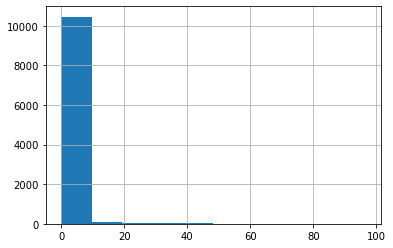

In [78]:
df_oh[df_oh['Parameter'] == 'Microcystins']['Result'].hist()
df_oh[df_oh['Parameter'] == 'Microcystins']['Result'].describe()

As with the historical data most of the values are quite close to zero. There are no extreme outliers to deal with here, no saturations, and no null coordinates.

In [79]:
df_oh['Saturation'] = False

In [82]:
df_oh_final = df_oh_final.append(df_oh)

In [83]:
df_oh_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11750 entries, 96 to 11047
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             11750 non-null  object        
 1   Site ID          11750 non-null  object        
 2   Site Type        11750 non-null  object        
 3   Collect Date     11750 non-null  datetime64[ns]
 4   Collection Time  11750 non-null  object        
 5   Sample ID        11750 non-null  object        
 6   Parameter        11750 non-null  object        
 7   Result           11750 non-null  float64       
 8   Units            11750 non-null  object        
 9   Qual.*           193 non-null    object        
 10  Program          1208 non-null   object        
 11  Lab              11750 non-null  object        
 12  Lat              11750 non-null  float64       
 13  Long             11750 non-null  float64       
 14  Saturation       11750 non-null  obje

## 2. GLERL Data<a id='2_Glerl_Data'></a>

### 2.1 Archived GLERL Data<a id='2.1_Archived_Glerl_Data'></a>

In [303]:
df_glerl_12_18 = pd.read_csv('../data/raw/0187718/2.2/data/0-data/lake_erie_habs_field_sampling_results_2012_2018_v2.csv', 
                             header=0, encoding='iso-8859-1', parse_dates=['Date'])
print(df_glerl_12_18.info())
df_glerl_12_18.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 36 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1244 non-null   datetime64[ns]
 1   Site                                                           1244 non-null   object        
 2   Station Depth (m)                                              873 non-null    float64       
 3   Sample Depth (m)                                               1227 non-null   float64       
 4   Sample Depth (category)                                        1244 non-null   object        
 5   Local Time (Eastern Time Zone)                                 881 non-null    object        
 6   Latitude (decimal deg)                                         868 non-null    float64       
 7

,Date,Site,Station Depth (m),Sample Depth (m),Sample Depth (category),Local Time (Eastern Time Zone),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),...,Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Urea (µg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Dissolved Organic Carbon (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L)
0,2012-05-15,WE2,5.1,0.75,Surface,10:40,41.0127,-83.0055,NaN,NaN,...,3.23,10.22,0.459,NaN,NaN,NaN,2.88,NaN,3.47,1.11
1,2012-05-15,WE4,10.0,0.75,Surface,10:08,41.8267,-83.1933,NaN,NaN,...,2.02,28.79,0.325,NaN,0.34,0.05,1.80,NaN,3.15,1.01
2,2012-05-15,WE6,2.7,0.75,Surface,11:02,41.7052,-83.3853,NaN,NaN,...,2.97,35.7,0.515,NaN,0.40,0.08,4.35,NaN,2.90,0.98
3,2012-05-15,WE8,4.5,0.75,Surface,11:31,41.8339,-83.3640,NaN,NaN,...,3.02,11.28,0.513,NaN,0.49,0.12,2.53,NaN,4.32,1.06
4,2012-05-31,WE2,8.2,0.75,Surface,11:15,41.7625,-83.3286,NaN,NaN,...,5.15,14.68,0.466,NaN,0.50,0.07,2.80,NaN,21.42,2.40


First it seems that the following colums are not strictly numeric:

'CTD Beam Attenuation (m-1)', 'CTD Tramission (%)', 'CTD Dissolved Oxygen (mg/L)', 'Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 'Extracted Phycocyanin (µg/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)', 'Nitrate + Nitrite (mg N/L)', 'Urea (µg N/L)'

In [304]:
df_glerl_12_18[df_glerl_12_18['CTD Beam Attenuation (m-1)'] == 'nd'].T

,1179
Date,2018-08-27 00:00:00
Site,WE9
Station Depth (m),2.45
Sample Depth (m),0.75
Sample Depth (category),Surface
Local Time (Eastern Time Zone),12:04
Latitude (decimal deg),41.7177
Longitude (decimal deg),-83.4257
Wind speed (knots),14.37
Wave Height (ft),0.76


In [305]:
df_glerl_12_18['CTD Tramission (%)'].sort_values()

522       0
800       0
328       0
1071      0
795       0
       ... 
1051    NaN
1052    NaN
1053    NaN
1054    NaN
1055    NaN
Name: CTD Tramission (%), Length: 1244, dtype: object

The Transmission % and CTD Beam Attenuation (m-1) refer to how strongly light is absorbed by the sample. A value of 'nd' for either of these means that none of the light is transmitted, so transmission should be 0% and the beam is considered to be very quickly attenuated, so beam attenuation will be set to the maximum detectable level. We can estimate the 'nd' threshold for beam attenuation by calculating the maximum for all rows where transmission is 0%. Since beam attenuation has a resolution of 0.1 I will set the 'nd' values to the max + 0.1

In [306]:
df_glerl_12_18.loc[df_glerl_12_18['CTD Tramission (%)']=='0', 'CTD Beam Attenuation (m-1)'].astype('float').max()

53.2

In [307]:
df_glerl_12_18.loc[df_glerl_12_18['CTD Beam Attenuation (m-1)']=='nd', 'CTD Beam Attenuation (m-1)'] = 53.3
df_glerl_12_18.loc[df_glerl_12_18['CTD Tramission (%)']=='nd', 'CTD Tramission (%)'] = 0

In [308]:
df_glerl_12_18['CTD Beam Attenuation (m-1)'] = df_glerl_12_18['CTD Beam Attenuation (m-1)'].astype('float')
df_glerl_12_18['CTD Tramission (%)'] = df_glerl_12_18['CTD Tramission (%)'].astype('float')

For the remaining values the biggest issue is values that contain a < sign. For these it is likely that the threshold is quite low, so it is reasonable to set these values to the threshold itself since numbers below the threshold should not be significantly different from the threshold in their interpretation.

In [309]:
#remaining object columns that should be floats
object_cols=['CTD Dissolved Oxygen (mg/L)','Particulate Microcystin (µg/L)', 'Dissolved Microcystin (µg/L)', 
             'Extracted Phycocyanin (µg/L)', 'Soluble Reactive Phosphorus (µg P/L)', 'Ammonia (µg N/L)', 
             'Nitrate + Nitrite (mg N/L)', 'Urea (µg N/L)']
for col in object_cols:
    df_glerl_12_18.loc[df_glerl_12_18[col] == 'nd', col] = 0
    df_glerl_12_18.loc[df_glerl_12_18[col].str.contains('<', na=False), col] = df_glerl_12_18.loc[df_glerl_12_18[col].str.contains('<', na=False), col].str.strip('<')
    df_glerl_12_18.loc[df_glerl_12_18[col] == '2778.75 ± 294', col] = 2778.75
    df_glerl_12_18.loc[df_glerl_12_18[col] == ' ', col] = np.nan
    df_glerl_12_18[col] = df_glerl_12_18[col].astype('float')

In [313]:
#Examine Wind Speed
df_glerl_12_18['Wind speed (knots)'].sort_values().unique()

array(['0.19', '0.27', '0.3', '0.42', '0.64', '0.74', '0.77', '0.79',
       '0.8', '0.81', '0.84', '0.85', '0.88', '0.92', '0.93', '0.97',
       '0.98', '1.06', '1.08', '1.11', '1.13', '1.19', '1.2', '1.22',
       '1.25', '1.27', '1.29', '1.34', '1.44', '1.46', '1.52', '1.53',
       '1.56', '1.59', '1.66', '1.67', '1.7', '1.75', '1.77', '1.78',
       '1.8', '1.81', '1.84', '1.85', '1.86', '1.87', '1.88', '1.9',
       '1.91', '1.92', '1.93', '1.94', '1.99', '10', '10-May', '10.04',
       '10.07', '10.14', '10.16', '10.2', '10.37', '10.43', '10.49',
       '10.52', '10.8', '10.91', '11.03', '11.08', '11.09', '11.11',
       '11.15', '11.34', '11.49', '11.52', '11.63', '11.65', '11.68',
       '11.9', '11.91', '12.05', '12.13', '12.24', '12.43', '12.45',
       '12.49', '12.52', '12.56', '12.64', '12.69', '13', '13.02',
       '13.09', '13.33', '13.39', '13.53', '13.58', '13.62', '13.65',
       '13.67', '13.88', '14', '14.07', '14.28', '14.37', '14.41',
       '14.43', '14.57', '1

In [315]:
#Clean Wind Speed
df_glerl_12_18.loc[df_glerl_12_18['Wind speed (knots)'].astype('str').str.contains('-', na=False), 
                   'Wind speed (knots)'] = np.nan
df_glerl_12_18.loc[df_glerl_12_18['Wind speed (knots)'] == 'nd', 'Wind speed (knots)'] = 0
df_glerl_12_18['Wind speed (knots)'] = df_glerl_12_18['Wind speed (knots)'].astype('float')

In [317]:
#Examine Secchi Depth
df_glerl_12_18['Secchi Depth (m)'].sort_values().unique()

array(['.', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8',
       '3', '3.2', '3.3', '3.5', '3.6', '3.8', '4', '4.5', '4.7', '5',
       '5.3', nan], dtype=object)

In [318]:
#Clean Secchi Depth
df_glerl_12_18.loc[df_glerl_12_18['Secchi Depth (m)'] == '.', 'Secchi Depth (m)'] = np.nan
df_glerl_12_18['Secchi Depth (m)'] = df_glerl_12_18['Secchi Depth (m)'].astype('float')

In [319]:
df_glerl_12_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 36 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1244 non-null   datetime64[ns]
 1   Site                                                           1244 non-null   object        
 2   Station Depth (m)                                              873 non-null    float64       
 3   Sample Depth (m)                                               1227 non-null   float64       
 4   Sample Depth (category)                                        1244 non-null   object        
 5   Local Time (Eastern Time Zone)                                 881 non-null    object        
 6   Latitude (decimal deg)                                         868 non-null    float64       
 7

In [237]:
import matplotlib.pyplot as plt

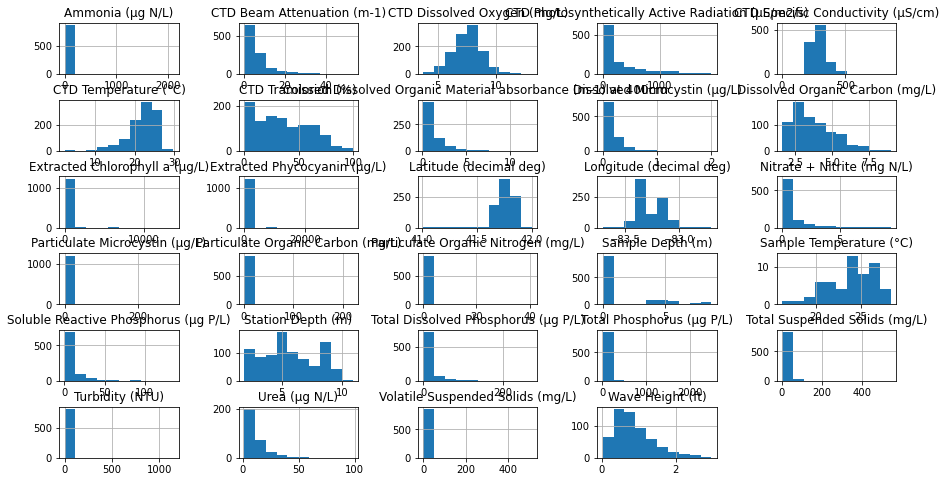

In [261]:
df_glerl_12_18.hist(figsize=(15,8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

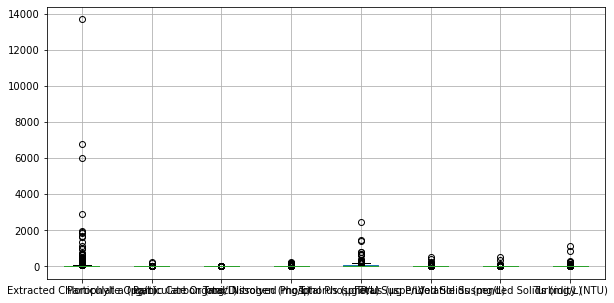

In [262]:
outliers=['Extracted Chlorophyll a (µg/L)','Particulate Organic Carbon (mg/L)', 'Particulate Organic Nitrogen (mg/L)',
          'Total Dissolved Phosphorus (µg P/L)', 'Total Phosphorus (µg P/L)', 'Total Suspended Solids (mg/L)', 
          'Volatile Suspended Solids (mg/L)', 'Turbidity (NTU)']
#get a better look at columns with outliers using boxplots
df_glerl_12_18[[col for col in outliers]].boxplot(figsize=(10,5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [240]:
#check extreme Chlorophyll values
df_glerl_12_18[df_glerl_12_18['Extracted Chlorophyll a (µg/L)'] > 50000].T

,410
Date,2015-08-10 00:00:00
Site,WE8
Station Depth (m),NaN
Sample Depth (m),NaN
Sample Depth (category),Scum
Local Time (Eastern Time Zone),NaN
Latitude (decimal deg),NaN
Longitude (decimal deg),NaN
Wind speed (knots),NaN
Wave Height (ft),NaN


It seems this outlier is for a 'Scum' sample. Let's check how many such samples there are and check out their chlorophyll, microcystin, and phycocyanin value.

In [253]:
df_glerl_12_18.loc[df_glerl_12_18['Sample Depth (category)'] == 'Scum',['Extracted Chlorophyll a (µg/L)',
                                                                        'Particulate Microcystin (µg/L)', 
                                                                        'Dissolved Microcystin (µg/L)', 
                                                                        'Extracted Phycocyanin (µg/L)']].T

,342,346,362,372,403,405,407,413,417,419,...,914,973,977,980,986,992,996,1000,1002,1015
Extracted Chlorophyll a (µg/L),142.98,440.58,508.86,630.96,1913.60,492.80,1712.64,5996.80,2889.60,671.36,...,222.71,1979.25,460.20,1647.73,614.23,13695.32,716.63,260.65,544.05,1345.50
Particulate Microcystin (µg/L),24.99,57.07,54.33,27.98,39.38,5.89,55.64,1.85,12.61,19.83,...,109.18,32.33,13.25,13.26,8.97,44.89,3.12,10.04,8.98,1.70
Dissolved Microcystin (µg/L),0.41,0.46,0.20,0.11,0.26,0.16,0.47,2.00,0.22,0.22,...,0.47,0.26,0.10,0.22,0.17,0.12,0.10,0.16,0.39,0.28
Extracted Phycocyanin (µg/L),80.32,1128.02,827.70,554.19,1742.62,100.13,1598.34,427.31,606.31,195.82,...,268.47,9829.75,2272.89,4179.01,1192.71,35696.32,1646.73,792.81,591.66,2405.82


In [254]:
df_glerl_12_18[df_glerl_12_18['Sample Depth (category)'] == 'Scum'].head().T

,342,346,362,372,403
Date,2015-07-06 00:00:00,2015-07-06 00:00:00,2015-07-20 00:00:00,2015-07-20 00:00:00,2015-08-10 00:00:00
Site,WE12,WE13,WE4,WE13,WE2
Station Depth (m),NaN,NaN,NaN,NaN,NaN
Sample Depth (m),NaN,NaN,NaN,NaN,NaN
Sample Depth (category),Scum,Scum,Scum,Scum,Scum
Local Time (Eastern Time Zone),NaN,NaN,NaN,NaN,NaN
Latitude (decimal deg),NaN,NaN,NaN,NaN,NaN
Longitude (decimal deg),NaN,NaN,NaN,NaN,NaN
Wind speed (knots),NaN,NaN,NaN,NaN,NaN
Wave Height (ft),NaN,NaN,NaN,NaN,NaN


It would appear that the Scum samples have high amounts of chlorophyll, particulate microcystin, and phycocyanin. This is logical since this indicates the formation of some sort of bloom. These scum events are likely the exact types of events we are trying to predict, so we certainly shouldn't drop them. On the other hand they don't have any other measurements since the presence of scum essentially prevents taking many CTD measurements. For now they will be left as they are. Let's look at how this impacts the distributions if we select only non-scum samples.

In [255]:
non_scum = df_glerl_12_18.loc[df_glerl_12_18['Sample Depth (category)'] != 'Scum']

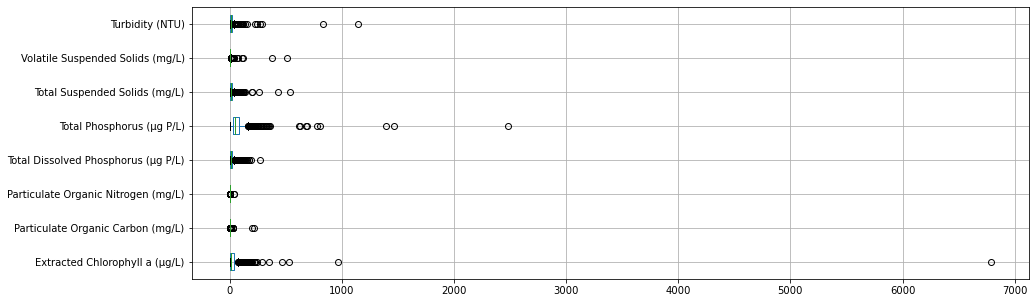

In [268]:
non_scum[[col for col in outliers]].boxplot(figsize=(15,5), vert=False)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [269]:
#Examine large chlorophyll outlier
non_scum[non_scum['Extracted Chlorophyll a (µg/L)'] > 6000].T

,408
Date,2015-08-10 00:00:00
Site,WE8
Station Depth (m),3.93
Sample Depth (m),0.75
Sample Depth (category),Surface
Local Time (Eastern Time Zone),13:58
Latitude (decimal deg),41.8351
Longitude (decimal deg),-83.3644
Wind speed (knots),0.85
Wave Height (ft),0.33


Again, even though this sample is not scum it also has high values for phycocyanin and particulate microcystin. In fact this point also explains the top outliers for Total Phosphorus and Turbidity. Just out of curiosity let's look at other measurements at that site during August 2015.

In [270]:
non_scum.loc[(non_scum['Site']=='WE8') & (non_scum['Date'] > '2015-08-01') & (non_scum['Date'] < '2015-08-31')].T

,392,393,408,409,426,427,439,440
Date,2015-08-04 00:00:00,2015-08-04 00:00:00,2015-08-10 00:00:00,2015-08-10 00:00:00,2015-08-17 00:00:00,2015-08-17 00:00:00,2015-08-25 00:00:00,2015-08-25 00:00:00
Site,WE8,WE8,WE8,WE8,WE8,WE8,WE8,WE8
Station Depth (m),4.75,NaN,3.93,NaN,4.76,NaN,4.34,NaN
Sample Depth (m),0.75,3.3,0.75,3.5,0.75,3.5,0.75,3
Sample Depth (category),Surface,Bottom,Surface,Bottom,Surface,Bottom,Surface,Bottom
Local Time (Eastern Time Zone),15:35,NaN,13:58,NaN,13:09,NaN,12:05,NaN
Latitude (decimal deg),41.8334,NaN,41.8351,NaN,41.8332,NaN,41.8335,NaN
Longitude (decimal deg),-83.3633,NaN,-83.3644,NaN,-83.3623,NaN,-83.3639,NaN
Wind speed (knots),3.19,NaN,0.85,NaN,2.15,NaN,4.53,NaN
Wave Height (ft),0.85,NaN,0.33,NaN,0.4,NaN,1.06,NaN


Overall it seems these outliers are not mistakes but rather genuine events in the data. Let's look at some plots to see if there is any correlation between the columns with outliers.

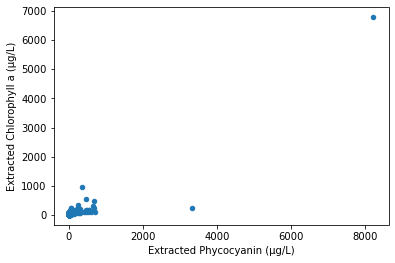

In [288]:
non_scum.plot.scatter(x='Extracted Phycocyanin (µg/L)', y='Extracted Chlorophyll a (µg/L)')

In [289]:
#dropping WE8 point to zoom in on rest of data
non_scum_strip = non_scum.drop(index=408)

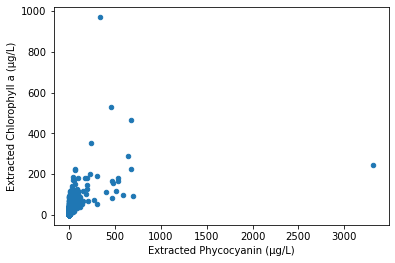

In [290]:
non_scum_strip.plot.scatter(x='Extracted Phycocyanin (µg/L)', y='Extracted Chlorophyll a (µg/L)')

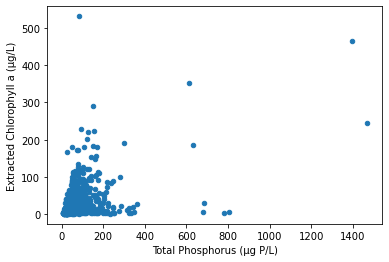

In [291]:
non_scum_strip.plot.scatter(x='Total Phosphorus (µg P/L)', y='Extracted Chlorophyll a (µg/L)')

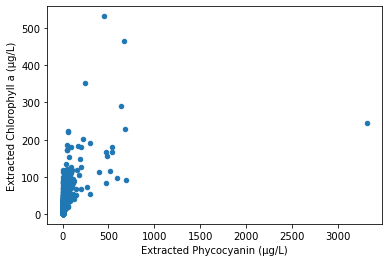

In [281]:
top = non_scum_strip[non_scum_strip['Sample Depth (category)'] == 'Surface']
top.plot.scatter(x='Extracted Phycocyanin (µg/L)', y='Extracted Chlorophyll a (µg/L)')

### 2.2 Current GLERL Data<a id='2.2_Current_Glerl_Data'></a>

In [321]:
df_glerl = pd.read_csv('../data/raw/0209116/1.1/data/0-data/lake_erie_habs_field_sampling_results_2019.csv', 
                       header=0, encoding='iso-8859-1', parse_dates=['Date'])
print(df_glerl.info())
df_glerl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 33 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           219 non-null    datetime64[ns]
 1   Site                                                           219 non-null    object        
 2   Station Depth (m)                                              140 non-null    float64       
 3   Sample Depth (m)                                               219 non-null    float64       
 4   Sample Depth (category)                                        219 non-null    object        
 5   Local Time (Eastern Time Zone)                                 142 non-null    object        
 6   Latitude (decimal deg)                                         137 non-null    float64       
 7  

,Date,Site,Station Depth (m),Sample Depth (m),Sample Depth (category),Local Time (Eastern Time Zone),Latitude (decimal deg),Longitude (decimal deg),Wind speed (knots),Wave Height (ft),...,Total Phosphorus (µg P/L),Total Dissolved Phosphorus (µg P/L),Soluble Reactive Phosphorus (µg P/L),Ammonia (µg N/L),Nitrate + Nitrite (mg N/L),Particulate Organic Carbon (mg/L),Particulate Organic Nitrogen (mg/L),Colored Dissolved Organic Material absorbance (m-1) at 400nm,Total Suspended Solids (mg/L),Volatile Suspended Solids (mg/L)
0,2019-04-30,WE2,5.90,0.75,Surface,11:41,41.7634,-83.3302,NaN,NaN,...,330.67,81.72,77.04,54.25,2.55,5.53,0.77,4.48,172.40,20.60
1,2019-04-30,WE2,NaN,5.50,Bottom,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-30,WE4,8.95,0.75,Surface,9:57,41.8275,-83.1931,NaN,NaN,...,19.94,6.48,5.05,62.40,0.446,0.81,0.08,0.43,8.96,1.48
3,2019-04-30,WE8,5.19,0.75,Surface,9:01,41.8343,-83.3594,NaN,NaN,...,86.72,23.51,19.12,12.73,1.817,2.66,0.27,1.40,38.37,4.53
4,2019-04-30,WE8,NaN,4.60,Bottom,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
for col in df_glerl_12_18.columns:
    if col not in df_glerl.columns:
        print(col, "in archived data, NOT current data")

for col in df_glerl.columns:
    if col not in df_glerl_12_18.columns:
        print(col, "in current data, NOT archived data")

In [333]:
#Sample temp likely refers to temp of sample in lab prior to testing, mostly null values. 
#Urea and dissolved organic carbon will also be dropped - the colored organic absorbance data can be used instead.
df_glerl_12_18.drop(columns=['Sample Temperature (°C)','Urea (µg N/L)', 'Dissolved Organic Carbon (mg/L)'], inplace=True)

In [336]:
#Examine object columns that we would like to be float
object_cols_2 = ['Secchi Depth (m)','Particulate Microcystin (µg/L)',
                 'Dissolved Microcystin (µg/L)', 'Nitrate + Nitrite (mg N/L)']
for col in object_cols_2:
    print(col + ':', df_glerl[col].sort_values().unique())

Secchi Depth (m): ['0.1' '0.2' '0.25' '0.3' '0.375' '0.5' '0.7' '0.75' '0.9' '1' '1.25'
 '1.5' '1.75' '2' '2.25' '2.5' '2.75' '3' '3.25' '3.75' '4' '6.5' '<0.1'
 nan]
Particulate Microcystin (µg/L): ['0.11' '0.12' '0.13' '0.16' '0.17' '0.21' '0.22' '0.25' '0.27' '0.29'
 '0.31' '0.32' '0.33' '0.36' '0.38' '0.48' '0.51' '0.52' '0.59' '0.64'
 '0.66' '0.67' '0.71' '0.72' '0.77' '0.78' '0.87' '0.88' '0.95' '1.16'
 '1.17' '1.27' '1.57' '1.59' '1.67' '1.7' '1.84' '1.89' '10.02' '10.33'
 '10.49' '10.61' '10.88' '10.98' '101.66' '11.41' '12.16' '12.9' '13.09'
 '13.11' '142.26' '18.66' '2.48' '2.64' '2.66' '2.82' '2.95' '2.97'
 '22.12' '3.04' '3.14' '3.17' '3.44' '3.52' '35.39' '4' '4.23' '4.3'
 '4.66' '4.82' '4.9' '4.97' '5.03' '5.06' '5.08' '5.18' '5.23' '5.46'
 '5.94' '7.02' '7.39' '7.6' '7.73' '7.79' '7.85' '7.95' '8' '8.33' '8.89'
 '8.94' '8.97' '9.83' '<0.1' nan]
Dissolved Microcystin (µg/L): ['0.03' '0.05' '0.08' '0.1' '0.11' '0.12' '0.13' '0.14' '0.15' '0.16'
 '0.17' '0.18' '0.19' '0.2' 

In [337]:
#strip < and convert columns to float:
for col in object_cols_2:
    df_glerl.loc[df_glerl[col].astype('str').str.contains('<'), col] = df_glerl.loc[df_glerl[col].astype('str').str.contains('<'), col].str.strip('<')
    df_glerl[col] = df_glerl[col].astype('float')

In [338]:
df_glerl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 33 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           219 non-null    datetime64[ns]
 1   Site                                                           219 non-null    object        
 2   Station Depth (m)                                              140 non-null    float64       
 3   Sample Depth (m)                                               219 non-null    float64       
 4   Sample Depth (category)                                        219 non-null    object        
 5   Local Time (Eastern Time Zone)                                 142 non-null    object        
 6   Latitude (decimal deg)                                         137 non-null    float64       
 7  

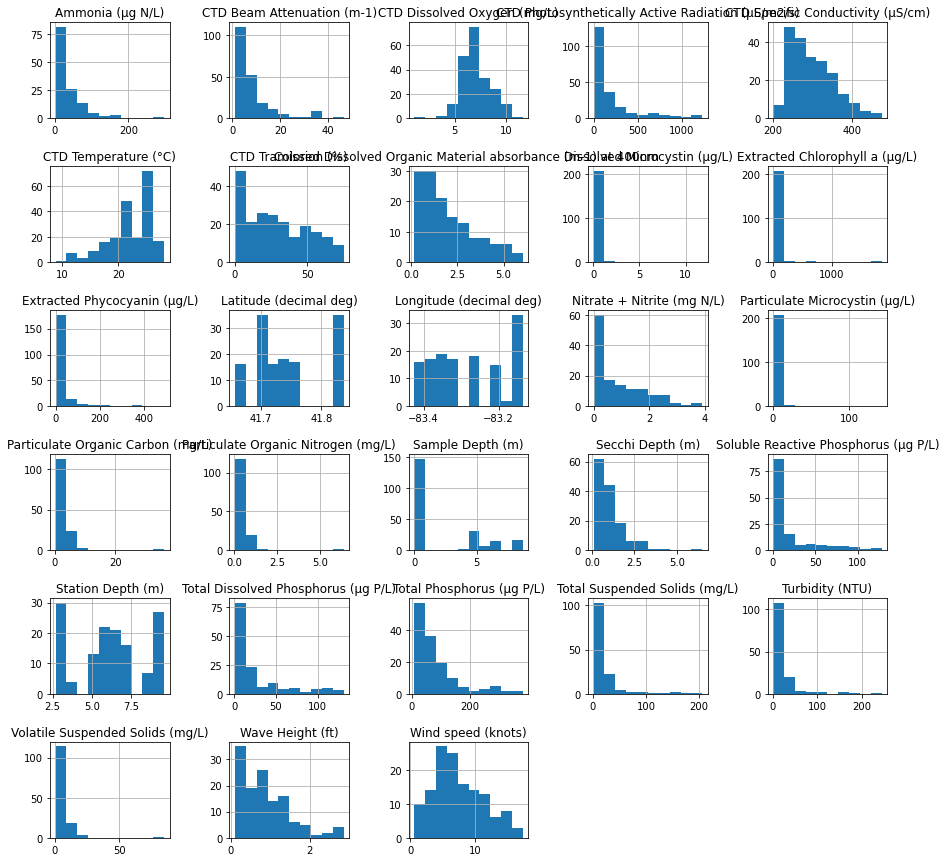

In [340]:
df_glerl.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

The columns with outliers are similar to those in the archived data. Let's see if we find similar trends for the high Extracted Chlorophyll values.

In [342]:
df_glerl[df_glerl['Extracted Chlorophyll a (µg/L)'] > 500].T

,110,111,118,135,139,145
Date,2019-08-05 00:00:00,2019-08-05 00:00:00,2019-08-05 00:00:00,2019-08-19 00:00:00,2019-08-19 00:00:00,2019-08-19 00:00:00
Site,WE9,WE9,2019.1,WE6,WE9,2019.2
Station Depth (m),3.26,NaN,NaN,NaN,NaN,NaN
Sample Depth (m),0.75,0,0,0,0,0
Sample Depth (category),Surface,Scum,Scum,Scum,Scum,Scum
Local Time (Eastern Time Zone),12:31,NaN,12:14,NaN,NaN,12:40
Latitude (decimal deg),41.7177,NaN,41.7075,NaN,NaN,41.7395
Longitude (decimal deg),-83.423,NaN,-83.3761,NaN,NaN,-83.3711
Wind speed (knots),2.38,NaN,NaN,NaN,NaN,NaN
Wave Height (ft),0.11,NaN,NaN,NaN,NaN,NaN


Again, mostly Scum samples and with high phycocyanin, microcystin and phosphorus levels.

In [343]:
#join the data sets
df_glerl = df_glerl.append(df_glerl_12_18)

In [344]:
df_glerl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1243
Data columns (total 33 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           1463 non-null   datetime64[ns]
 1   Site                                                           1463 non-null   object        
 2   Station Depth (m)                                              1013 non-null   float64       
 3   Sample Depth (m)                                               1446 non-null   float64       
 4   Sample Depth (category)                                        1463 non-null   object        
 5   Local Time (Eastern Time Zone)                                 1023 non-null   object        
 6   Latitude (decimal deg)                                         1005 non-null   float64       
 7